In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
# The new ones
import netCDF4
import cartopy.crs as ccrs
import cartopy.feature
from cartopy.util import add_cyclic_point
#import contextily as ctx
import datetime

In [2]:
url=('/home/leticia/Documentos/leticia_dados_CMIP/dados_CMIP5/IPSL/TSM/meantsm.nc')
f=netCDF4.Dataset(url)

In [3]:
print (f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    CDI: Climate Data Interface version 1.9.7.1 (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.4
    history: Thu Sep 01 23:11:30 2022: cdo subc,273.15 tsm_.nc tsm__.nc
Thu Sep 01 23:11:18 2022: cdo ymonmean tsm.nc tsm_.nc
Thu Sep 01 23:09:53 2022: cdo setcalendar,standard tsm_.nc tsm.nc
Thu Sep 01 23:08:40 2022: cdo remapbil,r360x180 tsm.nc tsm_.nc
Thu Sep 01 23:08:24 2022: cdo selyear,1980/2005 tos_Omon_IPSL-CM5A-LR_historical_r1i1p1_185001-200512.nc tsm.nc
2011-07-04T20:18:29Z CMOR rewrote data to comply with CF standards and CMIP5 requirements.
    source: IPSL-CM5A-LR (2010) : atmos : LMDZ4 (LMDZ4_v5, 96x95x39); ocean : ORCA2 (NEMOV2_3, 2x2L31); seaIce : LIM2 (NEMOV2_3); ocnBgchem : PISCES (NEMOV2_3); land : ORCHIDEE (orchidee_1_9_4_AR5)
    institution: IPSL (Institut Pierre Simon Laplace, Paris, France)
    institute_id: IPSL
    experiment_id: historical
    model_id: IPSL-CM5A-LR

In [4]:
print (f.variables['time'])

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: time
    units: days since 1850-01-01 00:00:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (12,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [5]:
print (f.variables['lat'])

<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [6]:
print (f.variables['lon'])

<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
unlimited dimensions: 
current shape = (360,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [8]:
print (f.variables['tos'])

<class 'netCDF4._netCDF4.Variable'>
float32 tos(time, lat, lon)
    standard_name: sea_surface_temperature
    long_name: Sea Surface Temperature
    units: K
    _FillValue: 1e+20
    missing_value: 1e+20
    comment: "this may differ from ""surface temperature"" in regions of sea ice."
    original_name: sosstsst
    original_units: degC
    history: 2011-07-04T20:18:27Z altered by CMOR: Converted units from 'degC' to 'K'. 2011-07-04T20:18:27Z altered by CMOR: replaced missing value flag (9.96921e+36) with standard missing value (1e+20).
    cell_methods: time: mean (interval: 30 minutes)
    cell_measures: area: areacello
    associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_ocean_fx_IPSL-CM5A-LR_historical_r0i0p0.nc areacello: areacello_fx_IPSL-CM5A-LR_historical_r0i0p0.nc
unlimited dimensions: time
current shape = (12, 180, 360)
filling on


In [9]:
f.variables['lat'][:]

masked_array(data=[-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5,
                   -81.5, -80.5, -79.5, -78.5, -77.5, -76.5, -75.5, -74.5,
                   -73.5, -72.5, -71.5, -70.5, -69.5, -68.5, -67.5, -66.5,
                   -65.5, -64.5, -63.5, -62.5, -61.5, -60.5, -59.5, -58.5,
                   -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
                   -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5,
                   -41.5, -40.5, -39.5, -38.5, -37.5, -36.5, -35.5, -34.5,
                   -33.5, -32.5, -31.5, -30.5, -29.5, -28.5, -27.5, -26.5,
                   -25.5, -24.5, -23.5, -22.5, -21.5, -20.5, -19.5, -18.5,
                   -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
                    -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,
                    -1.5,  -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,
                     6.5,   7.5,   8.5,   9.5,  10.5,  11.5,  12.5,  13.5,
                    14.5,

In [10]:
type(f.variables['lat'][:])

numpy.ma.core.MaskedArray

In [11]:
lon=f.variables['lon'][:]
lat=f.variables['lat'][:]
sst=f.variables['tos'][:]
time=f.variables['time'][:]

In [13]:
print(np.shape(time), np.shape(lon), np.shape(lat))

(12,) (360,) (180,)


In [14]:
np.shape(sst)

(12, 180, 360)

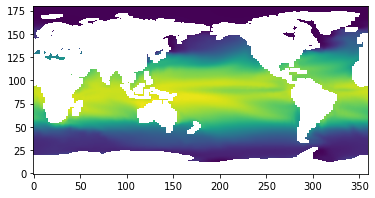

In [20]:
fig,ax=plt.subplots()
ax.imshow(sst[0],origin='lower')

Text(0.5, 1.0, 'Temp (°C)')

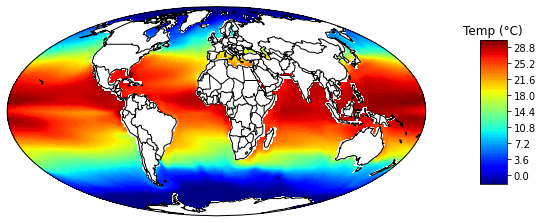

In [30]:
from mpl_toolkits.basemap import Basemap
fig,ax=plt.subplots()
fig.set_size_inches(7.5,5)
ax = plt.axes(projection=ccrs.Mollweide())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)

data, lonW = add_cyclic_point(sst[9], coord=lon) # gets rid of white l
air_contour=ax.contourf(lonW, lat, data,
             transform=ccrs.PlateCarree(),
              cmap='jet',levels=100)

cbar_ax = fig.add_axes([1.0, 0.3, .05, 0.4]) #x, y, xwidth, y height
fig.colorbar(air_contour, cax=cbar_ax)
cbar_ax.set_title('Temp (\N{DEGREE SIGN}C)')

In [32]:
print (f.variables['time'])

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: time
    units: days since 1850-01-01 00:00:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (12,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [77]:
nday=11
startdate=datetime.datetime(1850,1,1)
datedelta=datetime.timedelta(days=time[nday])
mapdate=startdate+datedelta
print ("The month is {:%B}".format(mapdate))

The month is December


In [78]:
for nday in np.arange(len(time)):
 print(nday)

0
1
2
3
4
5
6
7
8
9
10
11


In [91]:
startdate=datetime.datetime(1850,1,1)
for nday in np.arange(len(time)):
 datedelta=datetime.timedelta(days=time[nday])
 mapdate=startdate+datedelta
 filename="sst_{:03d}.png".format(nday)
 print("The date on day {} is {:%B} with filename {}".format(nday,mapdate,filename))

The date on day 0 is January with filename sst_000.png
The date on day 1 is February with filename sst_001.png
The date on day 2 is March with filename sst_002.png
The date on day 3 is April with filename sst_003.png
The date on day 4 is May with filename sst_004.png
The date on day 5 is June with filename sst_005.png
The date on day 6 is July with filename sst_006.png
The date on day 7 is August with filename sst_007.png
The date on day 8 is September with filename sst_008.png
The date on day 9 is October with filename sst_009.png
The date on day 10 is November with filename sst_010.png
The date on day 11 is December with filename sst_011.png


In [114]:
import imageio.v2 as io
import os

In [132]:
### option 2
png_dir = '/home/leticia/Documentos/leticia_dados_CMIP/dados_CMIP5/IPSL/TSM/'
images = []
for filename in sorted(os.listdir(png_dir)):
    if filename.endswith('.png'):
        file_path = os.path.join(png_dir, filename)
        images.append(imageio.imread(file_path))
        
imageio.mimsave(png_dir + 'TSM.mp4', images)

In [126]:
file_names = sorted((fn for fn in os.listdir('.') if fn.startswith('surface')))
#making animation
with io.get_writer('/home/leticia/Documentos/leticia_dados_CMIP/dados_CMIP5/IPSL/TSM/surface.gif', mode='I', duration=0.5) as writer:
    for filename in file_names:
        image = io.imread(filename)
        writer.append_data(image)
writer.close()
